##### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs

##### Create the dataset

In [4]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or array-like of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_sampl

In [18]:
x, y = make_blobs(n_samples=200, centers=4, n_features=2, 
                  random_state=0, cluster_std=0.6)

In [19]:
x

array([[ 2.23421043e+00,  1.69349520e+00],
       [-1.05510724e+00,  2.63803080e+00],
       [ 1.08272576e+00,  4.06271877e+00],
       [-2.60159431e+00,  7.22195591e+00],
       [ 1.60841463e+00,  4.01800537e-01],
       [ 9.82570091e-01,  5.37530962e+00],
       [-1.71343572e+00,  2.97632236e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 1.71444449e+00,  5.02521524e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [ 5.95676822e-01,  4.08614263e+00],
       [ 2.43040639e+00, -6.35709334e-02],
       [-2.10047101e+00,  2.71029320e+00],
       [-2.45138222e+00,  2.95583946e+00],
       [ 3.20903274e+00,  1.78597253e+00],
       [ 1.86922139e+00,  5.44132083e+00],
       [-1.46707190e+00,  7.92948233e+00],
       [-1.25766504e+00,  7.93201692e+00],
       [-1.40889590e+00,  7.15865322e+00],
       [ 1.53853211e+00,  2.04370263e+00],
       [-1.68001841e+00,  7.34766422e+00],
       [-8.35505074e-01,  3.56565342e+00],
       [ 1.84287117e+00,  7.26928839e-02],
       [-1.

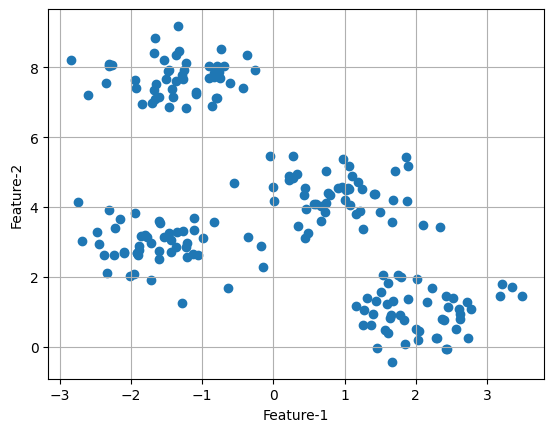

In [21]:
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.grid()
plt.scatter(x[:,0], x[:,1])

##### Build the DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a c

In [25]:
dbs = DBSCAN(eps=0.6, min_samples=4)

In [26]:
labels = dbs.fit_predict(x)

In [27]:
labels

array([ 0,  1,  2,  3,  0,  2,  1,  2, -1,  2,  2,  0,  1,  1,  0, -1,  3,
        3,  3,  0,  3,  1,  0,  1,  0,  0,  3,  0,  0,  2,  3,  2,  1,  0,
        1, -1,  1,  2,  2,  3,  3,  3,  3,  2,  0,  1,  2,  3,  3,  2,  3,
        1,  1,  3,  2,  3,  1,  0,  2,  0,  3,  2,  0,  2,  3,  2,  0,  3,
        1,  1,  0,  0,  2,  2,  1,  3,  1,  1,  0,  0,  3,  2,  0, -1,  1,
        2,  2,  0,  1,  1,  3,  3,  3,  2,  2,  0,  1,  3, -1,  2,  3,  0,
        0,  3,  3,  1,  2,  0,  0,  2,  3,  1,  1,  0,  0,  2, -1,  1,  3,
        2,  3,  1,  2,  0,  2,  1,  2,  1,  0,  2,  1,  0, -1,  3,  3,  1,
        3,  3,  0,  3,  0,  1,  0,  0, -1,  0,  2,  0,  1,  3,  3,  3,  2,
        1,  0,  2,  3,  1,  3,  0,  3,  0,  0,  1,  1,  3,  2,  0,  0,  1,
        0,  2,  1,  3,  3,  3,  2,  2,  1,  2, -1,  0,  2,  0,  2,  1,  1,
        3,  2,  3,  0,  0,  2,  3,  1,  1,  1,  2,  3,  0])

##### Visualize the clusters

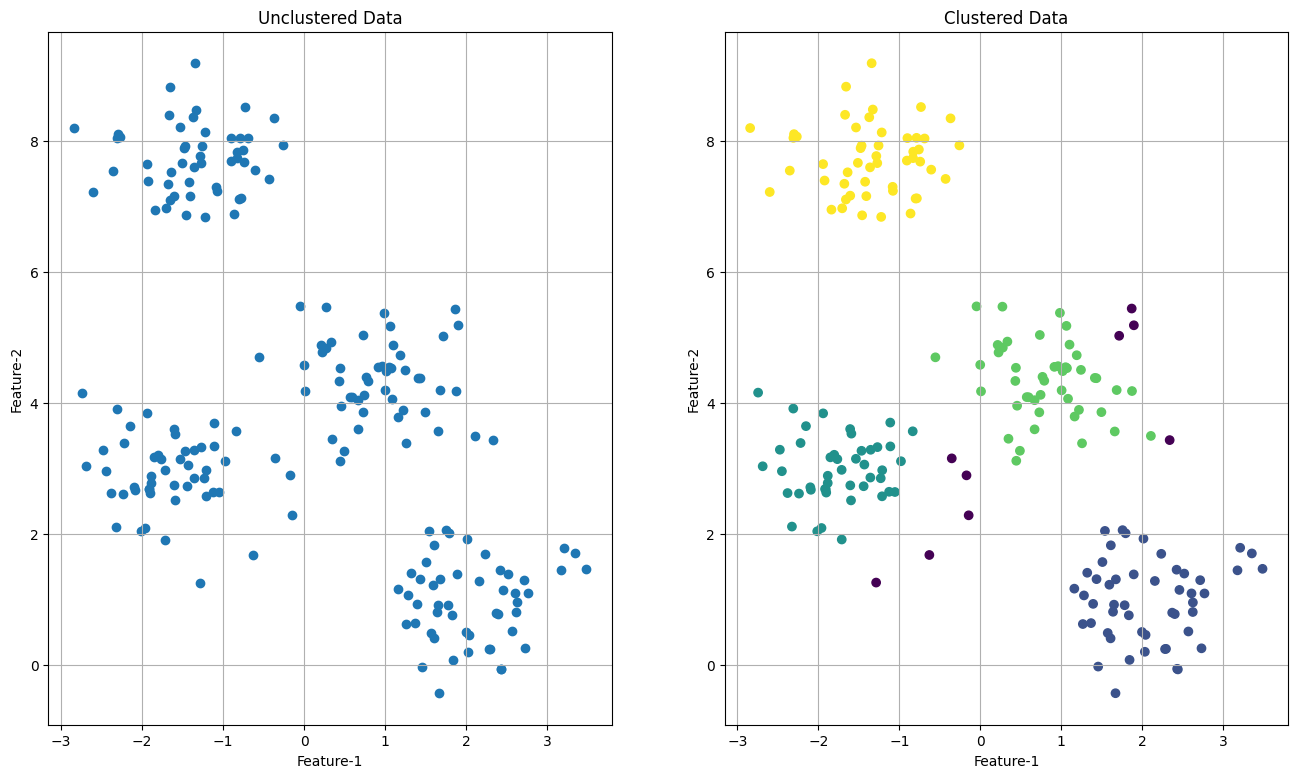

In [32]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.grid()
plt.scatter(x[:,0], x[:,1])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.grid()
plt.scatter(x[:,0], x[:,1], c = labels)

In [33]:
df = pd.DataFrame(data=x, columns=['Feature-1','Feature-2'])

In [34]:
df['class'] = labels

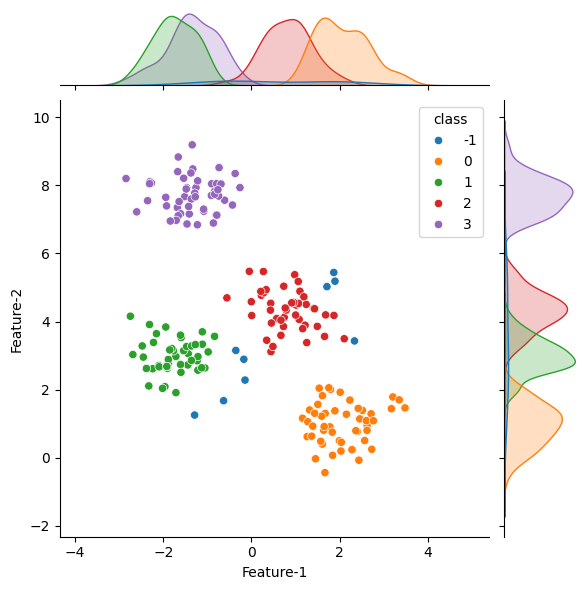

In [38]:
sns.jointplot(x='Feature-1', y='Feature-2', 
              data = df, hue = 'class', palette='tab10');

In [39]:
anomalies = df[labels==-1]

In [40]:
anomalies

,Feature-1,Feature-2,class
8,1.714444,5.025215,-1
15,1.869221,5.441321,-1
35,1.895938,5.185403,-1
83,-0.144554,2.281873,-1
98,2.338123,3.431168,-1
116,-0.630213,1.675891,-1
132,-0.353357,3.151938,-1
144,-1.287476,1.254327,-1
180,-0.171319,2.892528,-1
